# Morphoscanner Tutorial

This jupyter-notebook tutorial refer to:

> `morphoscanner` branch: `v0.0.4`

The aim of this tutorial is to guide the user through `morphoscanner` library workflow.

We performed our Molecular Dynamics simulations using the `GROMACS` software and the `Martini CG Force Field v2.2`.

### Import morphoscanner

In [1]:
import morphoscanner as ms

### Check for CUDA device
If `True`, the system is correctly configured to run on GPU.

If `False`, `morphoscanner` will run in parallel on the CPU.

In [2]:
import torch
from timeit import default_timer as timer
torch.cuda.is_available()

/home/lillo/anaconda3/envs/ms_release/lib/python3.8/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


False

### Data paths
The following cell is used to insert the path for your MD trajectory data.

In [ ]:
trj_gro = '/user/home/data/sistem_conf.gro'
trj_xtc = '/user/home/data/production.xtc'

prod_gro = '/user/home/data/sistem_conf.gro'
prod_xtc = '/user/home/data/production_part1.xtc'
prod1_xtc = '/user/home/data/production_part2.xtc'

_3perc_1_gro = '/user/home/data/final_equilibration.gro'
_3perc_1_trr = '/user/home/data/prod.trr'

_3perc_2_gro = '/user/home/data/final_equilibration1.gro'
_3perc_2_trr = '/user/home/data/prod1.trr'

_3perc_3_gro = '/user/home/data/final_equilibration2.gro'
_3perc_3_trr = '/user/home/data/prod2.trr'

In [3]:
### LAPTOP
gro = "/media/lillo/DATI/Dropbox/Dropbox (Personale)/Bicocca/CNTE/dataset/NMR_Utrecht/B24-NMR-Utrecht/whole_trajectory.gro"
xtc = "/media/lillo/DATI/Dropbox/Dropbox (Personale)/Bicocca/CNTE/dataset/NMR_Utrecht/B24-NMR-Utrecht/protein.xtc"

trj_gro = '/home/lillo/TesiCNTE/CNTE/trajectory/min-LDLK12-100mer-out-c.gro'    #laptop
trj_xtc = '/home/lillo/TesiCNTE/CNTE/trajectory/prd-LDLK12-100mer-out-mol.xtc'  #laptop

prod_gro = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part1/min.gro'            # laptop
prod_xtc = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part1/prod.xtc'           # laptop
prod1_xtc = '/home/lillo/TesiCNTE/from_cluster/prod/prod_part2/prod-compl.xtc'    # laptop

glac_3perc_1_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC/equilibration-2/eq-2-out.gro'
glac_3perc_1_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC/production/prd-6bis-GLAC-40mer-3per-out.trr'

glac_3perc_2_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC-2/equilibration-2/eq-2-out.gro'
glac_3perc_2_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC-2/production/prd-6bis-40mer-3per-out.trr'

glac_3perc_3_gro = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC-3/equilibration-2/eq-2-out.gro'
glac_3perc_3_trr = '/home/lillo/TesiCNTE/from_cluster/glicosilati_6bis/6bis-GlAC/3perc/6bis-GLAC-3/production/prd-6bis-GLAC-40mer-3per-out.trr'


## Single trajectory analysis
The class `morphoscanner.trajectory.trajectory()` instantiate the class instance `trajectory()`, that is responsible to perform the analysis on an MD trajectory.

The instance `trajectory()` perform the analysis, save the results of the analysis, and has the capability to visualize the computed data.

The `trajectory()` class need few arguments to be instantiated and start the analysis:

- _sys_config : `str`
  - file path of the initial configuration of the system (.gro file for GROMACS)
  
- _sys_traj : `str`
  - file path of the trajectory file (or files) (.xtc or .trr in GROMACS)
  
- select : `list(str)`, optional
  - The *parameter* `select` let you choose which atoms to parse. These are the atoms that will be used to perform the analysis. Atoms definitions are taken from the `Martini FF v2.2` and are found in the module `ms.molnames.constituents`. Default value is `select = ['aminoacids']`, that will select all the aminoacids ***alpha-carbon*** atoms.
  
`select = ['aminoacids']` will select the following atoms:
>`ms.molnames.aminoacids_list`\
\
['GLY',
 'ALA',
 'CYS',
 'VAL',
 'LEU',
 'ILE',
 'MET',
 'PRO',
 'ASN',
 'GLN',
 'ASP',
 'ASP0',
 'GLU',
 'GLU0',
 'THR',
 'SER',
 'LYS',
 'LYS0',
 'ARG',
 'ARG0',
 'HIS',
 'HISH',
 'PHE',
 'TYR',
 'TRP',
 'BTNr4']

`'aminoacids'` can be changed with one of the `ms.molnames.costituents.keys()` to select other atom types:

In [4]:
ms.molnames.costituents.keys()

dict_keys(['aminoacids', 'sugars', 'peptide', 'water', 'solvents'])

When instantiated, `trajectory()` will report exploratory data on the MD trajectory, like the number of frames in the system, the number of peptides in the system, with the name *Peptides*, and their number of aminoacids, called *Length*.

Ther output of an MD trajectory of 151 frames, of a system of 10 peptides of 96 aminoacids each, and 20 peptides of 12 aminoacids each will look like:
>In your trajectory there are 151 frames.\
Length: 96, Peptides: 10\
Length: 12, Peptides: 20


In [5]:
a = ms.trajectory.trajectory(glac_3perc_1_gro, glac_3perc_1_trr, select=['aminoacids'])
b = ms.trajectory.trajectory(glac_3perc_2_gro, glac_3perc_2_trr, select=['aminoacids'])
c = ms.trajectory.trajectory(glac_3perc_3_gro, glac_3perc_3_trr, select=['aminoacids'])

In your trajectory there are 1001 frames.

Length: 21, Peptides: 40
In your trajectory there are 1001 frames.

Length: 21, Peptides: 40
In your trajectory there are 1001 frames.

Length: 21, Peptides: 40


### There are data in the instantiated object
After the loading of an MD trajectory is completed, you will have access to some data on the trajectory itself, and to the `MDAnalysis.Universe()` ([here](https://userguide.mdanalysis.org/stable/examples/quickstart.html) the docs), that is used as our MD trajectory parser.

The available *attribute* of the instatiated object are:

##### number_of_frames
Is the number of frame, or timesteps, of the loaded MD trajectory.

In [6]:
a.number_of_frames

1001

##### len_dict
Is a `dict()` that has as `key : value` pairs where the `key` is the number of aminoacids, and the `value` is the number of peptides in the system that contain `key` aminoacids.

In a system with 40 pedides of 21 aminoacid each, the output will be:
>{21: 40}

In [7]:
a.len_dict

{21: 40}

##### peptide_length_list
Is a `list()` of `int`, where each entry is the number of aminoacids of a peptide in the system, starting from the first peptide in the system (starting from the top of the `.gro` file).

The system above, with 40 peptides of 21 aminoacids each will look like:
> [21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21]

In [8]:
a.peptide_length_list

[21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21]

##### universe
`universe` is just the `MDAnalysis.Universe()` exposed. You can refer to the MDAnalysis [docs](https://userguide.mdanalysis.org/stable/universe.html) for further information.

In [9]:
a.universe

<Universe with 46656 atoms>

##### select
`select` is the group of atom that you selected for parsing and analysis when the `trajectory()` was instantiated.

In [10]:
a.select

['aminoacids']

### Trajectory exploration
The exploratory step is needed to initializate a trajectory. It gives the possibility to give a look to the trajectory before to start the analysis.

If the exploration is succesful, a message will be reported, as:
> Exploration of frame 0 done.


In [11]:
a.explore()
b.explore()
c.explore()

Exploration of frame 0 done.

Exploration of frame 0 done.

Exploration of frame 0 done.



#### Visualize Exploratory frame
Visualization of *frame 0* of the explored trajectory can be useful to check if the desired parsing of the peptides have been made by *morphoscanner*, and to visualize the initial configuration of the sistem.\
The grains of a peptide are plotted with the same color.

To enable *interactive* 3D visualization:

In [12]:
%matplotlib notebook

To remove *interactive* 3D visualization:

In [13]:
%matplotlib inline

To visualize a frame:

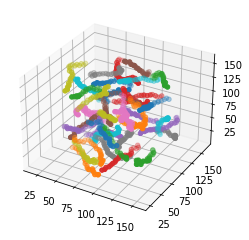

In [14]:
ms.plot.plot.plot_peptide_list(a.get_frame(0))

#### Parse frames of the trajectory
The input MD trajectory can be analyzed on each frame (timestep). Calling `compose_database()` enable the frames sampling and parsing.
`compose_database` has the following parameters:
- `sampling_interval` is an `int`.
- `direct_parse` is a `bool`

Each frame of the trajectory has an `index` = `i` of type `int` in ```F = [0, number_of_frame)```.\
If `i / sampling_interval = 0`, the frame is sampled for subsequent analysis. \
The sampled frames are the frames of which the index `i` is a multiple of `sampling_interval`.

In [ ]:
a.compose_database(sampling_interval=100)
b.compose_database(sampling_interval=100)
c.compose_database(sampling_interval=100)
#trj_prod.compose_database(sampling_interval=50)
#trj_mix.compose_database(sampling_interval=5)

At this point there is an implementation detail worth discussion, because two methods are used by `morphoscanner` to parse the `MDAnalysis.Universe()` that contains all the trajectory data.

We have parsed the trajectory for two times already, but using different methods. In the `explore()` step we parsed the `MDAnalysis.Universe()` using the following code:

```python
from morphoscanner import backend
from morphoscanner.backend import trj_object

def explore(self):
    '''
    Parse the first frame of the trajectory to gather peptide sequence, coordinates 
    and index number in the MDAnalysis.Universe(). 
    '''
    # the frame to parse is the first frame of the trajectory 
    frame = 0
    # instantiate the dict() that will contain the frame information
    self.frames = {}
    # instantiate the object 'frame'
    self.frames[frame] = trj_object.trj_objects.frames(frame)
    # instantiate 'peptide' object and fill with frame data
    self.frames[frame].peptides = backend.topology.get_data_from_trajectory_frame_v2(universe=self.universe, frame=frame, select=self.select)
    # to print when done
    print('Exploration of frame %d done.\n' % frame)

    return  
```

With `self.frames = {}` the frames `dict()` is created to contain all the sampled frames data.\
Then the object `frames` is instantiated, this is just a container for each `frame` data.\
After the steps above, the `peptides` attribute is created in the `frame` object. `peptides` is filled with peptides data by the function `backend.topology.get_data_from_trajectory_frame_v2()`, that directly interfaces with the `MDAnalysis.Universe`, capturing the system configuration in its first frame.

The collected data **for each peptide of the first frame** are:
- aminoacidic sequence
- atoms index
- atoms coordinate

Thanks to the above procedure, after calling `explore()`, we are able to explore the information of the first frame of the trajectory.


The method `compose_database` can use two different logics to parse the data:
- `direct_parse` = `True`, use the same method of the `explore()` function, and directly parse the data from the underlying `MDAnalisis.Universe`. 
- `direct_parse` = `False`, use the index and aminoacidic sequences already parsed from `explore()` **in the first frame**, and directly parse only the atoms coordinate relative to each frame. **This is the default behaviour**

The second approach (`direct_parse` = `False`) is faster, but requires two assumption to work:
- peptides grains do not change index in the MD trajectory.
- peptides grains are not removed, added or substituted in the MD trajectory.

This approach have less flexibility, but it really impact performances, as it more than 10 times faster than parsing with `backend.topology.get_data_from_trajectory_frame_v2`, that is the method used with `direct_parse` = ` True`.\
The performance improvement can be seen comparing the two methods with the following code:


***The same trajectory parsed with the two methods***

Use *direct* data parsing and retrival from the `MDAnalysis.Universe()` using the function `backend.topology.get_data_from_trajectory_frame_v2`.

In [15]:
%time a.compose_database(10, direct_parse=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.77it/s]

CPU times: user 20.7 s, sys: 102 ms, total: 20.8 s
Wall time: 21 s


100%|██████████| 100/100 [00:26<00:00,  3.77it/s]

CPU times: user 26.8 s, sys: 71.2 ms, total: 26.9 s\
Wall time: 26.6 s

Use *indirect* data parsing, keeps *sequence* and *atom_index* from the `frame 0` atoms, parsed before with the function `explore()`, and get only the new *coordinates* for each frame.

In [16]:
%time a.compose_database(10, direct_parse=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 79.64it/s]

CPU times: user 1.23 s, sys: 28 ms, total: 1.26 s
Wall time: 1.26 s


100%|██████████| 100/100 [00:01<00:00, 62.35it/s]

CPU times: user 1.6 s, sys: 15.9 ms, total: 1.62 s\
Wall time: 1.61 s

##### After parsing
When the trajectory dataset have been composed each sampled frame can be visualized, and the coordinates of each point is available.

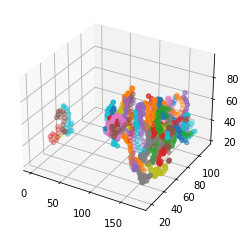

In [17]:
ms.plot.plot.plot_peptide_list(a.get_frame(1000))

### Analysis of the sampled frames

After the frame sampling and data retrieval each sampled frame of the system is analyzed with our algorithm, to search for the emergence of complex structures that match a beta sheets pattern.

The method `analyze_inLoop()` takes as parameters:
- `threshold` : `float`, optional\
    The default is `5`.\
    `threshold` is the longest distance at which two points *i*,*j* are considered in contact.\
    This means that if `ed(i,j) < threshold`, the points *i* and *j* are contacting.\
    `ed` is the *euclidean distance*.
-  `threshold_multiplier` : `float`, optional
    The default is `1.5`.
    `threshold_multiplier` is a factor used to multiply the calculated threshold distance for contact recognition.\
    The parameter `threshold_multipier` is overwritten if `threshold` is passed as parameters.
-   `device` : str, optional\
    The device on which the data are saved and the analysis is computed.\
    The option are:
    - `cpu`, to perform parallelization on cpu,
    - `cuda`, to performe parallelization on CUDA compatible device, usually Nvidia GPUs.\
    \
    The default is `cpu`.


In [ ]:
start = timer()
a.analyze_inLoop(threshold=5.1, threshold_multiplier=1.5, device='cpu')
b.analyze_inLoop(threshold=5.1, threshold_multiplier=1.5, device='cpu')
c.analyze_inLoop(threshold=5.1, threshold_multiplier=1.5, device='cpu')
#trj_prod.analyze_inLoop(threshold=5, device='cpu')
#trj_mix.analyze_inLoop(threshold=5, device='cpu')
end = timer()
print('total time was', (end-start))

The *parameters* of the method `analyze_inLoop()` are passed internally to the method `analysis()`, that is called on each sampled frame and performs the analysis.

The `analysis()` workflow consist of the following steps:
- `threshold` calculation, only if `threshold`=`None`
- frame's atoms coordinates retrival from the coordinate's database
- pairwise distance maps calculation
- contact maps calculation, using the threshold calculated above
- pattern recognition, analyze contact for matching with beta-sheet pattern
- compose a graph of contacting peptide matching the beta-sheet pattern
- search for isolated communities (cluster of peptides) in the graph

Each step will be here described in its logic and implementation.

#### threshold calculation
The `threshold` is the distance used to discriminate between atoms that are involved in an interaction.\
The distance between points `i` and `j` is `d[i][j] = sqrt(|i^2 - j^2|)`.\
If `d` < `threshold`, points `i` and `j` are defined as contacting.

**The `threshold` is an important parameter, because subsequent analysis steps depends on the contact found between peptides.**

> Default `threshold` is 5 (Angstrom).

If `threshold` == `None`, the `threshold` is calculated by `morphoscanner`.
The calculate `threshold` distance is the median distance between all the contiguous apha-carbon median distance of each peptides aminoacid in a frame, multiplied by a `threshold_multiplier`.

`threshold` is calculated as:
> `median(median(ed(p[c], p[c+1]) for c in [0, len(p)) for each p in f)`.\
\
Where **T** is the set of the sampled frames,\
*f* is a frame in *T*,\
*p* is a peptide in *f*,\
*c* is an alpha-carbon in *p*,\
*len(p)* is the number of *c* in *p*,\
*ed* is the euclidean distance,\
*median* is the median value.

The result of this calculation in our mesurements are between 3.3 and 3.5 Angstrom.

Inter alpha-carbon distance can be calculated and retrieved using the function `backend.distance_tensor.sample_intrapeptide_distance()`.

The above function can be used after `compose_database`. It gets as argument the `trajectory()` object on which the trajectory was composed, and `samples`, that are the number of frames to sample to get the inter alpha-carbon distance. `samples = 1` by default.

In the following cell we calculate the inter alpha-carbon distance for the `trajectory()` object `a` instantiated above, on 5 sampled frame.

In [ ]:
inter_ca_distance = ms.backend.distance_tensor.sample_intrapeptide_distance(a, samples=5)

Plot a *probability distrubution* histogram of the calculated distances.

In [ ]:
import matplotlib.pyplot as plt
data = plt.hist(inter_ca_distance,bins=20,density=True)

Calculate 95% confidence interval and median of computed distances:

In [ ]:
import numpy as np
low, high = np.percentile(inter_ca_distance, (2.5, 97.5))
median = np.percentile(inter_ca_distance, (50))
print('95% confidence interval is between', low, 'and', high,'Angstrom.\n')
print('median distance is', median,'Angstrom.\n')

The `threshold` is calculated only in the fist step of the trajectory, then is saved as an attribute of the `trajectory()` object, and used for all the frame contacts calculation.

With `a` as `trajectory()` class instance, the `threshold` used for the analysis is accessible at `a.contact_threshold`

#### frame's atoms coordinates retrival

Frame's coordinate are retrieved from the database using the class method `get_frame()`.
This method can be used to retrieve a specific sampled frame from the `trajectory()` class instance. If `a` is a `trajectory()` class instance:\
`a.get_frame(frame)` return a `dict` that contains all the frame's atoms coordinates. `frame` must be an int specifying one of the frames sampled by the method `compose_database()`. The sampled frames are the `key` of the `trajectory()` instance attribute `frames`.
Is possible to ask for the sampled frame using:\
`a.frames.keys()`.

#### pairwise distance maps and contacts maps calculation
To perform our analysis we need to undestand how peptides interact with each other.\
To obtain the **distance maps** that are used to track peptides motion through the trajectory, we compute the *euclidean distance* between each pair of atoms for each frame in the MD trajectory.\
From the *euclidean distance* calculation we obtain a set **D** of distance maps *d*,  that are matrix (or 2d tensors).

**D** [i,j] is the matrix *d* that contains the calculated euclidean distance between two peptides *i* and *j*. Each element *d* [x,y] is the distance between atom *x* of peptide *i* and atom *y* of peptide *j*.

The distance calculation is parallelized as tensor operation, thanks to `PyTorch` tensor engine. Our implementation is found in `morphoscanner.backend.distance_tensor.fast_cdist()`, and derive from Prof. Jacob R. Gardner implementation posted [here](https://github.com/pytorch/pytorch/pull/25799#issuecomment-529021810).

>A concern of the current implementation is that we do not have a limit on the `torch.tensor` size on which we operate. Internal tests with synthetic datasets have shown that the memory limit depends on the user's hardware, as RAM if computed on CPUs, or VRAM if computed on GPUs. We have not encountered issues with real MD trajectory dataset, but this limitation requires attention in future development.

**Contact maps** are calculated using the distance maps set **D** and the *threshold* distance above, from which we obtain the set **C**.

A contacts map *c* is the matrix **C** [i,j], derived from the distance map *d* = **D** [i,j], in which each element *c* [x,y] is:
>1 if *d* [x,y] < *threshold*.\
0 if *d* [x,y] > *threshold*.

Both distance and contacts maps are calculated with the function `morphoscanner.backend.distance_tensor.compute_distance_and_contact_maps()`,and are saved as instance attribute. With `a` as our instance, these maps are accessible under `a.frames[frame].results.distance_maps`and `a.frames[frame].results.contact_maps`, where `frame` is one of the sampled frames, `a.frames.keys()`.

#### pattern recognition
`morphoscanner` main goal is to **recognize beta-sheet-like structures**.\
Beta-sheets consist of beta-strands connected laterally by at least two backbone hydrogen bonds, forming a pleated sheet.\
A beta-strand is a stretch of polypeptide chain typically 3 to 10 amino acids long with backbone in an extended conformation.\
Beta-strands in a beta-sheet can be *parallel* (head to head) or *antiparallel* (head to tail), depending on the respective position of the interacting peptides.

To recognize beta-sheet pattern, `morphoscanner` checks for contacts using a *shift matrix library* composed for each contact map.\
The *shift matrix library* is composed by two set of matrix, one *parallel* and one *antiparallel*, that span all the given contact map, searching for contacts resembling the beta sheet pattern. The match between each *shift matrix* and a contact map is scored with the *Normalized Cross-Correlation Function*, and the shift matrix with the higher score is used to denoise the contact map.\
The denoised contact map is then selected as matching the beta-sheet pattern only if it has at least 2 contacts.\
At the end of the pattern recognition step, the set of denoised contact maps and a `pandas.DataFrame` containing the beta-sheet matching contacts information are given. The `pandas.DataFrame` is saved as a class instance attribute. With `a` as class instance, `a.frames[frame].results.cross_correlation` return the `pandas.DataFrame`.\
The dataframe contains the following information:
- **peptide1**: the index of peptide `i` that partecipate in the contact
- **peptide2**: the index of peptide `j` that partecipate in the contact
- **NCC Value**: the *Normalized Cross Correlation* score between the *contact map* and best matching *shift matrix*
- **shift index**: the index of the best matching *shift matrix* in the corresponding *shift matrix library*
- **contact**: the number of contacts between the two contacting peptides
- **sense**: the sense *parallel* pr *antiparallel* of the contact
- **shift**: the shift between the two contacting peptides. A *shift* value of 0 means that the peptides are perfectly aligned, in an *head to head* if *sense* is parallel, or *head to tail* if the *sense* is antiparallel.

#### composing a graph
A graph ***g*** [v,e] is composed, in which each `vertex` **v** is a peptide, and **e** is an `edge` that joints two nodes that contact with a beta sheet pattern.\
The graph is a `networkx.Graph()`, that can be analyzed with the tools available in the `NetworkX` library.\
With `a` as class instance, the graph is saved in `a.frames[frame].results.graph`.\
The graph composed for each sampled frame can be visualized with `a.plot_graph(frame)`. The plotted graph has visual aids to qualitatively describe the interaction between the peptides:
- each `vertex` has a **label**, that is the index `i` of the corresponding peptide. More info on that peptide can be found in `a.frames[frame].peptide[i]`.
- each `edge` has:
    - **thickness**: the edge's thickness is proportional to the number of contact between the nodes joined by the edge.
    - **color**
        - *green*: identify parallel contacts
        - *blue*: identify antiparallel contacts

#### search for interacting group of peptides in the graph
We use ***depth first search*** to cluster contacting peptides in the graph.\
The algorithm `nx.algorithms.traversal.depth_first_search.dfs_tree()` is implemented in the class method `morphoscanner.backend.graph.find_subgraph()`. The search output is saved as a `list()` **l** of `list()` **c**.\
Each element *e* of cluster **c** is the index of a peptide in graph **g**. Clusters **c** in **l** are ordered from the biggest to the smaller.

### Recover Data after the analysis

In [ ]:
a.get_data()
b.get_data()
c.get_data()
#trj_prod.get_data()
#trj_mix.get_data()

The method `get_data()` run a set of other methods that recover data from the analysis. Additional class attributes are created.\
The obtained data are saved in `pandas.DataFrame`, reachable from `a.database`.\
In `a.database` there is a row for each sampled and analyzed timestep (or frame) of the trajectory. For each sampled timestep, the following data are saved in separate columns:
- **n° of peptides in macroaggragate**:\
    is an ordered descending `list()` in which each element is the number of peptide found in a peptide cluster
- **parallel**:\
    is an `int`, the number of parallel contact in that timestep
- **antiparallel**:\
    is an `int`, the number of antiparallel contact in that timestep
- **n° of macroaggregate**:\
    is an `int`, the number of clusters in the frame. Is equal to **len(*n° of peptides in macroaggragate*)**.
- There are then a number of other columns, in which the label in an `int` from 0 to *N* that depends on the number *N* of peptides cluster found in that frame. If clusters are found, the corresponding columns contains a `dict()` with the `key:value`:
    - *parallel* : `int`
    - *antiparallel* : `int`
    
  In which the `int` value define the number of *parallel* or *antiparallel* contacts on that cluster.

In [ ]:
a.database

### Data Visualization

The instance of the class `morphoscanner.tajectory.trajectory()` has a set of methods to visualize the data obtained from the analysis. 

#### plot_frame_aggregate(frame=`int`)
Plot the frame with a color code that identify the sense of the majority of contacts in an cluster.
- **Grey**: no contact,
- **Green**: majority of parallel contacts,
- **Blue**: majority of antparallel contacts,
- **Yellow**: equal number of parallel and antiparallel contacts

In [ ]:
a.plot_frame_aggregate(1000)

#### plot_graph(frame=`int`):
Visualize the graph of the selected `frame`, with visual information about number of contacts between peptides and sense of the contacts:

- **Edge thickness** scale with the number of contacts between two contacting peptides.
- **Green** edges are parallel contacts.
- **Blue** edges are antiparallel contacts.


In [ ]:
a.plot_graph(1000)

#### plot_contacts(kind='cubic')
Plot the ratio `antiparallel contacts` / `total contact` for each sampled timestep (or frame).\
`kind` Is the kind of interpolation used to plot the data. The same as `scipy.interpolate.interp1()`

In [ ]:
a.plot_contacts()

#### plot_peptides_in_beta(kind='cubic'):
Plot the ratio `peptide in beta` / `total peptide` for each sampled timestep (or frame).

In [ ]:
a.plot_peptides_in_beta()

#### plot_aggregates(kind='cubic'):
Plot `the number of macroaggregates` or clusters for each sampled timestep (or frame).

In [ ]:
a.plot_aggregates()

#### plot3d
The distribution of **shift values** during the trajectory can be visualized with three separate methods, one for each type of shift:
- plot3d_parallel():
- plot3d_antiparallel_negative()
- plot3d_antiparallel_positive()

In [ ]:
a.plot3d_parallel()

In [ ]:
a.plot3d_antiparallel_negative()

In [ ]:
a.plot3d_antiparallel_positive()

#### 3d Plot a distance map

In [ ]:
a.plot_3d_distance_map(frame=1000,i=35,j=19)

#### Visualize peptides

In [ ]:
ms.plot.plot.plot_peptide_list(a.get_frame(1000), [35,19])

## Multi trajectory analysis

The module `morphoscanner.analysis()` can be used to compute statistics on multiple `trajectory()` class instances. The following data can be visualized:
- **Aggregation Order**: the number of clusters emerging during the MD trajectory
- **Beta-sheet alignment**: the ratio *antiparallel contacts* / *total contacts*
- **Fraction of peptides that form Bete-sheets**: the ratio *contacting peptides* / *total peptides*
- **Peptides shift**: shift distribution average of the studied trajectories
    - *Parallel*
    - *Antiparallel Positive*
    - *Antiparallel Negative*


#### Aggregation order

In [ ]:
ms.analysis.plot_aggregates_average([a], label='a')
ms.analysis.plot_aggregates_average([b], label='b')
ms.analysis.plot_aggregates_average([c], label='c')
ms.analysis.plot_aggregates_average([a,b,c], label='mean')

#### Beta sheet aligment

In [ ]:
ms.analysis.plot_contacts_average([a], label='a')
ms.analysis.plot_contacts_average([b], label='b')
ms.analysis.plot_contacts_average([c], label='c')
ms.analysis.plot_contacts_average([a,b,c], label='mean')

#### Fraction of peptides that forms beta sheets

In [ ]:
ms.analysis.plot_beta_average([a], label='a')
ms.analysis.plot_beta_average([b], label='b')
ms.analysis.plot_beta_average([c], label='c')
ms.analysis.plot_beta_average([a,b,c], label='mean')

#### Parallel shift

In [ ]:
ms.analysis.plot_3d_parallel_average([a,b,c])

#### Antiparallel positive shift

In [ ]:
ms.analysis.plot_3d_antiparallel_positive_average([a,b,c])

#### Antiparallel negative shift

In [ ]:
ms.analysis.plot_3d_antiparallel_negative_average([a,b,c])

#### Calculate helix score for a single sampled frame

In [ ]:
a.calculate_helix_score_for_frame(0)

The results of the helix score calulation are saved in the `result` object of the selected frame.

In [ ]:
a.frames[0].results.helix_score

#### Calculate the helix score for each sampled frame of the trajectory

In [ ]:
a.helix_score()

The results of the helix score calulation are saved in the `result` object of each frame.

In [ ]:
a.frames[100].results.helix_score